In [4]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

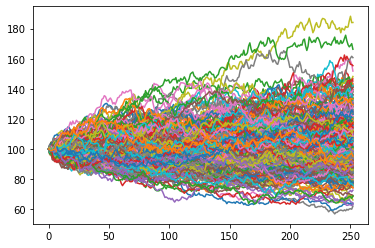

In [219]:
# Geometric Brownian Motion by Eule-Maruyama
def gbm_path(S0,mean,volatility,T=1,t=252,N=1000):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * phi)
    return S
# Phlot GBM function
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])
df = gbm_path(100,0.05,0.2,1,252,1000)
plot_path(df)

In [261]:
def mv_path(S0,mean,volatility,T=1,t=252,N=100,k=1):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    #alpha = mu
    #alpha = mu - ((sigma ** 2) / (2*k))
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] + k * (alpha - S[i-1]) * dt + sigma * phi * np.sqrt(dt)
    return S


79.28584724053307

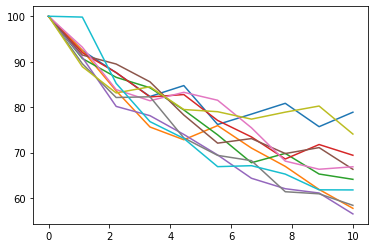

In [263]:
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])
#def mv_path(S0,mean,volatility,T=1,t=252,N=1000,k=1):
df = mv_path(100,90,10,1,10,100)
#df = mv_path(10,10,3,1,252,10000)
plot_path(df,10)
np.mean(df)
